# `ratar` tutorial

### `ratar` - Read-Across the TARgetome

This is an introduction on how to use the `ratar` "package" so far...

1. Import packages
2. Load binding sites
3. Encode binding sites
4. Explore encoded binding site
5. Compare binding sites
6. How to...

## Import packages

In [1]:
import sys
sys.path.append("/home/dominique/Documents/projects/ratar/ratar/")

In [2]:
from encoding import *
from similarity import *
from auxiliary import *
import itertools
import seaborn as sns

## Load binding sites

### 1. Get list of file paths to be loaded

In [3]:
input_path = "/home/dominique/Documents/data/klifs/egfr_20190506/structures/HUMAN/EGFR/*/pocket_pp.mol2"
input_path_list = glob.glob(input_path)
input_path_list = input_path_list[:5]

**Note:** Package `glob` was loaded with ratar package - should it be loaded individually in this notebook?

In [4]:
input_path_list[0]

'/home/dominique/Documents/data/klifs/egfr_20190506/structures/HUMAN/EGFR/2eb2_chainA/pocket_pp.mol2'

**Note:** Mol2 files were pre-processed for `biopandas` (remove 10th column)

In [5]:
%%bash
# Remove 10th column from mol2 file for biopandas can only read 9 columns
files=/home/dominique/Documents/data/klifs/egfr_20190506/structures/HUMAN/EGFR/*/pocket.mol2
for i in $files
do 
less $i | awk '!($10="")' > ${i:0:-5}_pp.mol2
done

## Load binding sites

### 2. Load file content with `biopandas`

In [6]:
# Load all files
mol_loader = [MolFileLoader(i) for i in input_path_list]

In [7]:
# Get file content as DataFrame
pmols = [i.pmols for i in mol_loader]

In [8]:
pmols

[[<biopandas.mol2.pandas_mol2.PandasMol2 at 0x7ff8250e3b70>],

In [9]:
# Flatten list > list of DataFrames
pmols = list(itertools.chain.from_iterable(pmols))

In [10]:
print(f'Number of structures: {len(pmols)}')

Number of structures: 5


## Encode binding sites

In [11]:
BindingSite?

In [12]:
binding_sites = [BindingSite(i) for i in pmols]

In [13]:
# Select example binding site
bs = binding_sites[0]

In [14]:
bs.mol.head()

,atom_id,atom_name,residue_id,residue_name,subst_name,x,y,z,charge,amino_acid
0,1,N,716,LYS,LYS716,6.3685,18.8487,54.3817,0.0,LYS
1,2,H,716,LYS,LYS716,6.0481,19.3909,53.5922,0.0,LYS
2,3,CA,716,LYS,LYS716,6.4092,17.3975,54.2690,0.0,LYS
3,4,HA,716,LYS,LYS716,7.3001,17.0218,54.7723,0.0,LYS
4,5,C,716,LYS,LYS716,6.4435,17.0314,52.8019,0.0,LYS


In [15]:
bs.pdb_id

'HUMAN/EGFR_2eb2_chainA'

## Explore encoded binding site

### 1. Representatives

In [16]:
bs.repres.repres_dict.keys()

dict_keys(['ca', 'pca', 'pc'])

In [17]:
bs.repres.repres_dict["ca"].head()

,atom_id,atom_name,residue_id,residue_name,subst_name,x,y,z,charge
2,3,CA,716,LYS,LYS716,6.4092,17.3975,54.2690,0.0000
24,25,CA,717,VAL,VAL717,6.9823,15.3409,51.1523,0.0000
40,41,CA,718,LEU,LEU718,4.3387,14.4305,48.5807,0.0000
59,60,CA,719,SER,SER719,6.1104,12.1018,46.1160,0.2811
70,71,CA,720,SER,SER720,9.3123,10.6224,44.6388,0.0000


## Explore encoded binding site

### 2. Subsets

In [18]:
bs.subset.subsets_indices_dict.keys()

dict_keys(['pc', 'pca'])

In [19]:
bs.subset.subsets_indices_dict['pc']

{'H': Int64Index([   6,   28,   44,  109,  146,  168,  184,  194,  213,  250,  284,
              303,  349,  380,  396,  413,  434,  461,  493,  509,  520,  544,
              563,  589,  625,  644,  694,  713,  729,  771,  782,  801,  853,
              869,  929,  975,  999, 1023, 1042, 1075, 1111, 1130, 1140, 1150,
             1188, 1204, 1223, 1239, 1311, 1330],
            dtype='int64'),
 'AR': Int64Index([   4,   26,   42,   61,   72,   87,   93,  107,  123,  125,  144,
              166,  182,  192,  211,  233,  248,  267,  282,  301,  320,  332,
              347,  357,  359,  378,  394,  411,  421,  432,  448,  459,  474,
              479,  491,  507,  518,  542,  561,  581,  587,  606,  623,  642,
              661,  675,  692,  711,  727,  742,  747,  763,  769,  780,  799,
              818,  830,  832,  851,  867,  891,  906,  908,  927,  946,  961,
              973,  997, 1021, 1040, 1056, 1061, 1073, 1097, 1109, 1128, 1138,
             1148, 1172, 1186, 1202, 1221,

## Explore encoded binding site

### 3. Spatial and physicochemical properties

In [20]:
bs.coord.coord_dict.keys()

dict_keys(['ca', 'pca', 'pc'])

In [21]:
bs.coord.coord_dict['ca'].head()

,x,y,z
2,6.4092,17.3975,54.2690
24,6.9823,15.3409,51.1523
40,4.3387,14.4305,48.5807
59,6.1104,12.1018,46.1160
70,9.3123,10.6224,44.6388


In [22]:
bs.pcprop.pcprop_dict.keys()

dict_keys(['ca', 'pca', 'pc'])

In [23]:
bs.pcprop.pcprop_dict['ca'].keys()

dict_keys(['z1', 'z12', 'z123'])

In [24]:
bs.pcprop.pcprop_dict['ca']['z123'].head()

,z1,z2,z3
2,2.29,0.89,-2.49
24,-2.59,-2.64,-1.54
40,-4.28,-1.30,-1.49
59,2.39,-1.07,1.15
70,2.39,-1.07,1.15


## Explore encoded binding site

### 4. Set up dimensions for binding site representatives (= points)

In [25]:
bs.points.points_dict.keys()

dict_keys(['ca', 'ca_z1', 'ca_z12', 'ca_z123', 'pca', 'pca_z1', 'pca_z12', 'pca_z123', 'pc', 'pc_z1', 'pc_z12', 'pc_z123'])

In [26]:
bs.points.points_dict['ca_z123'].head()

,x,y,z,z1,z2,z3
2,6.4092,17.3975,54.2690,2.29,0.89,-2.49
24,6.9823,15.3409,51.1523,-2.59,-2.64,-1.54
40,4.3387,14.4305,48.5807,-4.28,-1.30,-1.49
59,6.1104,12.1018,46.1160,2.39,-1.07,1.15
70,9.3123,10.6224,44.6388,2.39,-1.07,1.15


In [27]:
bs.points.points_subsets_dict.keys()

dict_keys(['pc_z1', 'pc_z12', 'pc_z123', 'pca_z1', 'pca_z12', 'pca_z123'])

In [28]:
bs.points.points_subsets_dict['pc_z123'].keys()

dict_keys(['H', 'AR', 'HBD', 'HBA'])

In [29]:
bs.points.points_subsets_dict['pc_z123']['HBA'].head()

,x,y,z,z1,z2,z3
5,6.0944,17.8275,51.9464,2.29,0.89,-2.49
27,4.7272,14.5747,51.3286,-2.59,-2.64,-1.54
43,3.7225,12.4570,47.3594,-4.28,-1.30,-1.49
62,8.3426,12.9613,45.8855,2.39,-1.07,1.15
74,10.3767,9.7446,42.6768,2.39,-1.07,1.15


## Explore encoded binding site 

### 5. Get encoding methods

In [30]:
bs.shapes.shapes_dict.keys()

dict_keys(['ca', 'ca_z1', 'ca_z12', 'ca_z123', 'pca', 'pca_z1', 'pca_z12', 'pca_z123', 'pc', 'pc_z1', 'pc_z12', 'pc_z123'])

In [31]:
bs.shapes.shapes_dict['ca'].keys()

dict_keys(['3dim_usr', '3dim_csr'])

In [32]:
bs.shapes.shapes_dict['ca_z1'].keys()

dict_keys(['4_dim_electroshape'])

In [33]:
bs.shapes.shapes_dict['ca_z123'].keys()

dict_keys(['6dim'])

## Explore encoded binding site

### 6. Get reference points

In [34]:
bs.shapes.shapes_dict['ca_z123']['6dim'].keys()

dict_keys(['ref_points', 'dist', 'moments'])

In [35]:
# Reference points!
bs.shapes.shapes_dict['ca_z123']['6dim']['ref_points']

,x,y,z,z1,z2,z3
c1,0.838117,21.255682,37.212835,-0.405366,-0.630366,-0.519024
c2,-1.815100,20.626400,35.050600,0.750000,-2.180000,-1.120000
c3,-10.921800,7.274100,46.735500,3.110000,0.260000,-0.110000
c4,-2.871600,28.623700,20.874100,3.520000,2.500000,-3.500000
c5,-0.937200,28.701900,38.700600,3.520000,2.500000,-3.500000
c6,4.537900,18.043600,26.667100,-4.280000,-1.300000,-1.490000
c7,-0.937200,28.701900,38.700600,3.520000,2.500000,-3.500000


## Explore encoded binding site

### 7. Get distances

In [36]:
# Distances from each reference points to all binding site representatives
bs.shapes.shapes_dict['ca_z123']['6dim']['dist'].head()

,dist_c1,dist_c2,dist_c3,dist_c4,dist_c5,dist_c6,dist_c7
2,18.716211,21.472895,21.594770,36.503497,20.718572,28.543740,20.718572
24,16.640251,19.394306,21.167973,35.466813,21.537710,24.848720,21.537710
40,14.299284,16.897758,18.613215,33.172445,20.210009,22.210359,20.210009
59,14.200347,16.340136,17.823053,32.038217,20.392755,21.622878,20.392755
70,15.837184,18.025183,20.709924,32.755144,22.423806,21.268815,22.423806


In [37]:
bs.shapes.shapes_dict['ca_z123']['6dim']['dist'].shape

(82, 7)

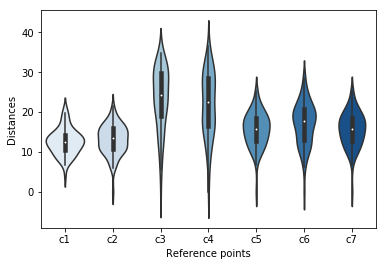

In [38]:
data = bs.shapes.shapes_dict['ca_z123']['6dim']['dist']
data.rename(index=str, columns={i:i[-2:] for i in data.keys()}, inplace=True)
data_m = pd.melt(data)
data_m.rename(index=str, columns={'variable': 'Reference points', 'value': 'Distances'}, inplace=True)

sns.violinplot(x=data_m['Reference points'], y=data_m['Distances'], palette='Blues')

## Explore encoded binding site

### 8. Get fingerprint (moments)

In [39]:
# The actual binding site fingerprint!!
bs.shapes.shapes_dict['ca_z123']['6dim']['moments'].head()

,m1,m2,m3
dist_c1,12.648647,3.303894,0.649959
dist_c2,13.166558,3.713356,-0.773868
dist_c3,23.456639,7.684818,-0.906213
dist_c4,21.862088,7.917214,-0.696547
dist_c5,15.718431,4.340138,-0.758969


## Compare binding sites



In [40]:
# Save binding sites to disc
[save_binding_site(i, f'/home/dominique/Tmp/encoding/{i.pdb_id}/ratar_encoding.p') for i in binding_sites]

[None, None, None, None, None]

In [41]:
# Get all-against-all matrices for different encoding types
aaa_dict = get_similarity_all_against_all('/home/dominique/Tmp/encoding/HUMAN/*/ratar_encoding.p')
aaa_dict.keys()

dict_keys(['ca_3dim_usr', 'ca_3dim_csr', 'ca_z1_4_dim_electroshape', 'ca_z123_6dim', 'pca_3dim_usr', 'pca_3dim_csr', 'pca_z1_4_dim_electroshape', 'pca_z123_6dim', 'pc_3dim_usr', 'pc_3dim_csr', 'pc_z1_4_dim_electroshape', 'pc_z123_6dim'])

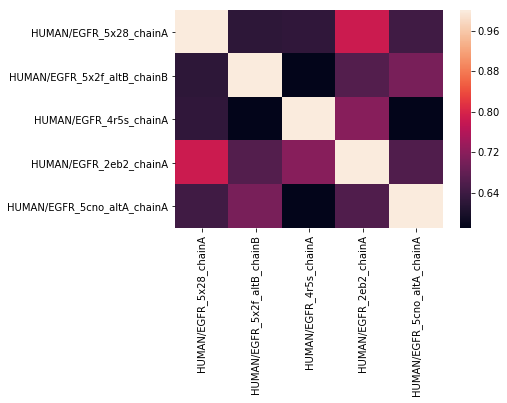

In [42]:
data = aaa_dict['ca_z123_6dim']
sns.heatmap(data)

## How to...

* organise functions? Class-specific functions within class, more general functions in extra file?
* docstring functions without return value?
* 

In [43]:
save_binding_site?